My Idea for the Bank Heist

Rules:  Total Time: 24hrs, 
        Get back to Helicopter Zone (0,0), 
        Travel Speed: 30km/hr

Algorithm:
1. I am already waiting at the starting point. (bank with highest money/time value)
2. Rob the bank, travel to the next bank
3. Check the time
4. Go to the (0,0) zone before time = 0

Always follow the speed limit (even while robbing the banks, LOL)

In [128]:
import math as m
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# get the data
df = pd.read_csv('/Users/sandeepreddy/Documents/concordia-bootcamps/ds-project-the-big-heist/data/bank_data.csv')
df.head()

,id,x_coordinate,y_coordinate,money,time (hr)
0,0,2.851925,1.201712,29700,0.273403
1,1,4.150372,-2.654334,6500,0.064040
2,2,-1.494092,-1.230419,89400,0.127458
3,3,1.271326,-0.088520,96100,1.315029
4,4,2.471113,-0.592810,41100,0.164393


In [41]:
# make a copy of the dataframe
heist = df.copy()
heist

,id,x_coordinate,y_coordinate,money,time (hr)
0,0,2.851925,1.201712,29700,0.273403
1,1,4.150372,-2.654334,6500,0.064040
2,2,-1.494092,-1.230419,89400,0.127458
3,3,1.271326,-0.088520,96100,1.315029
4,4,2.471113,-0.592810,41100,0.164393
...,...,...,...,...,...
9995,9995,-2.472127,4.787304,2100,0.494904
9996,9996,1.034968,-4.321240,54900,0.492866
9997,9997,-0.512720,-2.949173,32200,0.933033
9998,9998,2.626841,-3.482923,5100,0.551312


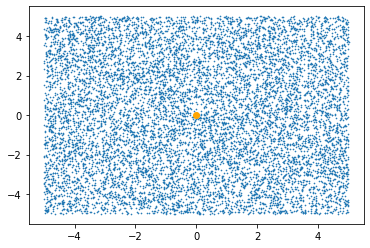

In [42]:
# Visualize the banks on the map
plt.scatter(heist['x_coordinate'],heist['y_coordinate'],alpha=1,s=0.4)   # banks
plt.scatter(0, 0, color='orange', alpha=1)                               # helicopter
plt.show()

In [48]:
# get the x and y coordinates together as a seperate column as "bank location"
heist['bank_loc'] = list(zip(heist['x_coordinate'],heist['y_coordinate']))

In [49]:
# Now, for the starting point, choose the bank with huge money but should take less time to rob.
# So, create a new column for money/time, sort the dataframe to find the starting point.

heist['money/time'] = heist['money']/heist['time (hr)']
heist = heist.sort_values('money/time',ascending=False)
heist.head()

,id,x_coordinate,y_coordinate,money,time (hr),bank_loc,money/time
3613,3613,-1.950527,-1.495858,54400,0.000186,"(-1.950526922, -1.49585784)",2.929598e+08
9546,9546,-1.810721,-0.795421,75100,0.000788,"(-1.810721369, -0.795421225)",9.530554e+07
3803,3803,3.867586,0.918332,18500,0.000358,"(3.867585718, 0.918331555)",5.169374e+07
6528,6528,-0.282937,3.224334,33900,0.000769,"(-0.282936706, 3.224334325)",4.407761e+07
9583,9583,3.393835,-2.790830,24000,0.001131,"(3.393835415, -2.790830218)",2.121397e+07


In [116]:
# function to calculate the distance between two banks

def distance(id1, id2):
    return m.hypot(id2[0] - id1[0], id2[1] - id1[1])
     

In [117]:
# Convert the dataframe columns to lists

bank_id_lst = [i for i in heist["id"]]              # bank's ID list
bank_money_lst = [m for m in heist["money"]]        # bank's money list
bank_time_lst = [t for t in heist["time (hr)"]]     # bank's time to rob list
bank_loc_lst = [l for l in heist["bank_loc"]]       # bank's location list

In [135]:
# function to rob the banks

def robber_algorithm():
    
    # Initialization
    time_limit = float(24)         # time left to rob the banks
    speed = float(30)              # setting the speed     
    end_point = [0,0]              # end point location
    robbed_money = 0               # total robbed money
    rob_path = []                  # robbing bank path
    
    if len(bank_loc_lst) == len(set(bank_loc_lst)):         # checking for duplicates
        for i in range(len(bank_loc_lst)):                  # tarvelling from one bank to other
            if time_limit>0.1:                              # checking the time left (0.1 - time to travel to the helicopter)
                robbed_money += bank_money_lst[i]                                   # adding the money into the bags
                rob_path.append(bank_id_lst[i])                                     # adding the bank id into the path
                time_limit -= bank_time_lst[i]                                      # spending the time required to rob
                time_limit -= distance(bank_loc_lst[i],bank_loc_lst[i+1])/speed     # travelling to the next bank
        
        rob_path.append(end_point)                                                  # going to the end point before the time 
        print(f"Robbed Money: {robbed_money}$ \n")
        print(f"Total No.of Banks robbed: {len(rob_path)-1} \n")
        print(f"Robbed Path: {rob_path}")
        
           
            

In [136]:
robber_algorithm()

Robbed Money: 6439300$ 

Total No.of Banks robbed: 128 

Robbed Path: [3613, 9546, 3803, 6528, 9583, 5933, 9195, 4757, 8550, 4499, 9241, 7343, 3798, 7544, 4762, 8436, 8562, 6097, 487, 2928, 5135, 865, 3914, 4987, 3466, 7560, 8579, 8690, 8469, 433, 524, 6468, 1914, 1757, 8287, 7258, 4725, 8206, 4605, 7064, 3926, 9401, 9736, 2331, 9653, 7074, 2346, 8966, 4696, 8022, 4789, 6740, 9881, 70, 2656, 951, 209, 58, 9228, 3193, 8525, 5610, 2037, 4287, 6022, 2827, 8849, 9378, 6104, 2741, 7701, 8355, 5563, 3005, 7665, 6987, 5719, 2729, 1997, 8286, 4906, 613, 790, 7087, 5126, 5562, 3516, 2243, 6759, 3026, 1372, 2442, 1733, 8375, 7764, 7649, 7689, 9880, 3297, 4794, 3089, 7583, 5725, 517, 4345, 2521, 2190, 5155, 9049, 444, 6712, 8908, 8703, 7877, 7595, 8231, 9275, 4465, 5295, 5296, 299, 8846, 6254, 507, 6535, 6216, 279, 5166, [0, 0]]
